In [ ]:
# ЛИНЕЙНЫЙ ГРАФИК (LINEPLOT)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

vg_data = pd.read_csv('data/vgsales.csv')
dinamic_by_region = vg_data[
        ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year_of_Release']
    ].groupby('Year_of_Release').sum()

fig = plt.figure(figsize=(12, 6))
lineplot = sns.lineplot(data=dinamic_by_region)
lineplot.set_title('Динамика продаж видеоигр', fontsize=16)
lineplot.set_xlabel('Год выпуска')
lineplot.set_ylabel('Суммарный объём продаж')

In [ ]:
# ГИСТОГРАММА (HISTOGRAM)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

melb_data = pd.read_csv('data/melb_data.csv')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))
plt.subplots_adjust(hspace=.0)

histplot1 = sns.histplot(
    data=melb_data, 
    x='Price', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение стоимости недвижимости в Мельбурне', fontsize=16)
histplot1.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot1.set_ylabel('Число объектов')

histplot2 = sns.histplot(
    data=melb_data,
    x='Price',
    y='Type',
    bins=30,
    color='green',
    ax=axes[1]
)
histplot2.set_xlabel('Цена объекта (млн. австралийских долларов)')
histplot2.set_ylabel('Тип объекта')

In [ ]:
# ДИАГРАММА РАССЕЯНИЯ (SCATTERPLOT)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

penguins_df = sns.load_dataset("penguins")

fig = plt.figure(figsize=(10, 5))

scatterplot = sns.scatterplot(
    data=penguins_df,
    x='bill_length_mm',
    y='flipper_length_mm',
    hue='species',
    s=100,
    size='sex',
    sizes=(50, 300)

)
scatterplot.set_title('Взаимосвязь размеров параметров тела разных видов пингвинов', fontsize=16)
scatterplot.set_xlabel('Длина клюва')
scatterplot.set_ylabel('Длина крыльев')

In [ ]:
# КРУГОВАЯ ДИАГРАММА (PIE CHART)
import matplotlib.pyplot as plt
import pandas as pd

game_of_thrones_df = pd.read_csv('data/character-deaths.csv')
game_of_thrones_df['Allegiances'] = game_of_thrones_df['Allegiances'].str.replace('House ', '')
fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = game_of_thrones_df['Allegiances'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.1f%%',
    startangle=90
)
title = ax.set_title('Смертность персонажей в GoT в зависимости от их верности', fontsize=16)
plt.show(pie)

In [ ]:
# СТОЛБЧАТАЯ ДИАГРАММА (BAR CHART)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

amazon_data = pd.read_csv('data/amazon_com.csv')

def replace_url(brand_name):
    if 'ref=' in brand_name:
        if 'Calvin' in brand_name:
            return 'Calvin-Klein'
        elif 'Wacoal' in brand_name:
            return 'Wacoal'
        else:
            return 'b.tempt'
    else:
        return brand_name
    
amazon_data['brand_name'] = amazon_data['brand_name'].apply(replace_url)
amazon_data['price'] = amazon_data['price'].str.replace('$', '').astype('float64')
amazon_data['brand_name'].unique()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))
barplot1 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    orient='v',
    ax = axes[0],
    ci=None
)
barplot1.tick_params(axis='x', rotation=70);
barplot1.set_title('Средняя стоимость товаров по брендам', fontsize=16);
barplot1.set_xlabel('Название бренда', fontsize=14);
barplot1.set_ylabel('Средняя цена', fontsize=14);
barplot1.grid()

barplot2 = sns.barplot(
    data=amazon_data,
    x='brand_name',
    y='price',
    hue='product_category',
    orient='v',
    ax = axes[1],
    ci=None,
    dodge=False
)
barplot2.tick_params(axis='x', rotation=70);
barplot2.set_title('Средняя стоимость товаров по брендам и категориям', fontsize=16);
barplot2.set_xlabel('Название бренда', fontsize=14);
barplot2.set_ylabel('Средняя цена', fontsize=14);
barplot2.grid()

In [ ]:
#ТЕПЛОВАЯ КАРТА (HEATMAP)
tweets_df = pd.read_csv("https://bit.ly/3cngqgL", 
                 parse_dates=['date_utc'], 
                 dtype={'hour_utc':int,'minute_utc':int,'id':str}
                )
g = tweets_df.groupby(['hour_utc','minute_utc','username'])
tweet_cnt = g.id.nunique()
jb_tweet_cnt = tweet_cnt.loc[:,:,'JoeBiden'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
dt_tweet_cnt = tweet_cnt.loc[:,:,'realDonaldTrump'].reset_index().pivot_table(index='hour_utc', columns='minute_utc', values='id', fill_value=0)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16, 12))
jb_heatmap = sns.heatmap(
    jb_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[0]
)
jb_heatmap.set_title('@JoeBiden');
jb_heatmap.set_xlabel('Минута часа');
jb_heatmap.set_ylabel('Час дня');

dt_heatmap = sns.heatmap(
    dt_tweet_cnt,
    linewidth=1,
    linecolor='w',
    cmap='viridis',
    ax = axes[1]
)

dt_heatmap.set_title('@realDonaldTrump');
dt_heatmap.set_xlabel('Минута часа');
dt_heatmap.set_ylabel('Час дня');

In [ ]:
# КОРОБЧАТАЯ ДИАГРАММА (BOXPLOT, BOX AND WHISKER PLOT)
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

citibike_df = pd.read_csv('data/citibike-tripdata.csv')
citibike_df['age'] = 2018 - citibike_df['birth year']

fig = plt.figure(figsize=(12, 6))
boxplot = sns.boxplot(data=citibike_df, x='age', y='usertype')
boxplot.set_title('Boxplot для возраста пользователей приложения CitiBike', fontsize=16)
boxplot.set_xlabel('Возраст пользователя')
boxplot.set_ylabel('Тип пользователя')

In [1]:
import pandas as pd
covid_data = pd.read_csv('C:\Учёба\IDE\Skillfactory\PYTHON-13. Визуализация данных\data/covid_data.csv')
display(covid_data.head())

date province/state country  confirmed  deaths  recovered
0  01/22/2020          Anhui   China        1.0     0.0        0.0
1  01/22/2020        Beijing   China       14.0     0.0        0.0
2  01/22/2020      Chongqing   China        6.0     0.0        0.0
3  01/22/2020         Fujian   China        1.0     0.0        0.0
4  01/22/2020          Gansu   China        0.0     0.0        0.0

In [2]:
vaccinations_data = pd.read_csv('C:\Учёба\IDE\Skillfactory\PYTHON-13. Визуализация данных\data/country_vaccinations.csv')
vaccinations_data = vaccinations_data[
    ['country', 'date', 'total_vaccinations', 
     'people_vaccinated', 'people_vaccinated_per_hundred',
     'people_fully_vaccinated', 'people_fully_vaccinated_per_hundred',
     'daily_vaccinations', 'vaccines']
]
display(vaccinations_data.head())

country        date  total_vaccinations  people_vaccinated  \
0  Afghanistan  2021-02-22                 0.0                0.0   
1  Afghanistan  2021-02-23                 NaN                NaN   
2  Afghanistan  2021-02-24                 NaN                NaN   
3  Afghanistan  2021-02-25                 NaN                NaN   
4  Afghanistan  2021-02-26                 NaN                NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated  \
0                            0.0                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   
3                            NaN                      NaN   
4                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations  \
0                                  NaN                 NaN   
1                                  NaN              1367.0   
2                                  NaN              1367.0   
3                                  NaN              1367.0   
4                                  NaN              1367.0   

                                            vaccines  
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...

ПРЕДОБРАБОТКА ДАННЫХ

In [3]:
# Группируем таблицу по дате и названию страны и рассчитываем 
# суммарные показатели по всем регионам. Тем самым переходим 
# от данных по регионам к данным по странам:
covid_data = covid_data.groupby(
    ['date', 'country'], 
    as_index=False
)[['confirmed', 'deaths', 'recovered']].sum()
display(covid_data.head())

date      country  confirmed  deaths  recovered
0  01/01/2021  Afghanistan    51526.0  2191.0    41727.0
1  01/01/2021      Albania    58316.0  1181.0    33634.0
2  01/01/2021      Algeria    99897.0  2762.0    67395.0
3  01/01/2021      Andorra     8117.0    84.0     7463.0
4  01/01/2021       Angola    17568.0   405.0    11146.0

In [4]:
# Преобразуем даты в формат datetime с помощью функции pd.to_datetime():
covid_data['date'] = pd.to_datetime(covid_data['date'])
display(covid_data.head())

date      country  confirmed  deaths  recovered
0 2021-01-01  Afghanistan    51526.0  2191.0    41727.0
1 2021-01-01      Albania    58316.0  1181.0    33634.0
2 2021-01-01      Algeria    99897.0  2762.0    67395.0
3 2021-01-01      Andorra     8117.0    84.0     7463.0
4 2021-01-01       Angola    17568.0   405.0    11146.0

In [5]:
# Создадим признак больных на данный момент (active). 
# Для этого вычтем из общего числа зафиксированных 
# случаев число смертей и число выздоровевших пациентов:
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
display(covid_data.head())

date      country  confirmed  deaths  recovered   active
0 2021-01-01  Afghanistan    51526.0  2191.0    41727.0   7608.0
1 2021-01-01      Albania    58316.0  1181.0    33634.0  23501.0
2 2021-01-01      Algeria    99897.0  2762.0    67395.0  29740.0
3 2021-01-01      Andorra     8117.0    84.0     7463.0    570.0
4 2021-01-01       Angola    17568.0   405.0    11146.0   6017.0

In [6]:
# Создадим признак ежедневного прироста числа заболевших, умерших и 
# выздоровевших людей. Для этого отсортируем данные по названиям стран,
# а затем по датам. После этого произведём группировку по странам 
# и рассчитаем разницу между «вчера и сегодня» с помощью метода diff():
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
display(covid_data.head())

date      country  confirmed  deaths  recovered  active  \
11337 2020-02-24  Afghanistan        1.0     0.0        0.0     1.0   
11570 2020-02-25  Afghanistan        1.0     0.0        0.0     1.0   
11807 2020-02-26  Afghanistan        1.0     0.0        0.0     1.0   
12051 2020-02-27  Afghanistan        1.0     0.0        0.0     1.0   
12299 2020-02-28  Afghanistan        1.0     0.0        0.0     1.0   

       daily_confirmed  daily_deaths  daily_recovered  
11337              NaN           NaN              NaN  
11570              0.0           0.0              0.0  
11807              0.0           0.0              0.0  
12051              0.0           0.0              0.0  
12299              0.0           0.0              0.0

In [7]:
# В таблице vaccinations_data достаточно будет 
# преобразовать столбцы в формат datetime:
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
display(vaccinations_data.head())

country       date  total_vaccinations  people_vaccinated  \
0  Afghanistan 2021-02-22                 0.0                0.0   
1  Afghanistan 2021-02-23                 NaN                NaN   
2  Afghanistan 2021-02-24                 NaN                NaN   
3  Afghanistan 2021-02-25                 NaN                NaN   
4  Afghanistan 2021-02-26                 NaN                NaN   

   people_vaccinated_per_hundred  people_fully_vaccinated  \
0                            0.0                      NaN   
1                            NaN                      NaN   
2                            NaN                      NaN   
3                            NaN                      NaN   
4                            NaN                      NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations  \
0                                  NaN                 NaN   
1                                  NaN              1367.0   
2                                  NaN              1367.0   
3                                  NaN              1367.0   
4                                  NaN              1367.0   

                                            vaccines  
0  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
1  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
2  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
3  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...  
4  Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...

In [10]:
# За какой период представлены данные в таблице covid_data? 
print(f"Данные о заболеваемости предоставлены от {covid_data['date'].min()} до {covid_data['date'].max()}")

Данные о заболеваемости предоставлены от 2020-01-22 00:00:00 до 2021-05-29 00:00:00


In [12]:
# За какой период представлены данные в таблице vaccinations_data? 
print(f"Данные о вакцинации предоставлены от {vaccinations_data['date'].min()} до {vaccinations_data['date'].max()}")

Данные о вакцинации предоставлены от 2020-12-02 00:00:00 до 2021-09-06 00:00:00


In [8]:
# С помощью метода merge() объедините таблицы covid_data и 
# vaccinations_data по столбцам date и country. Тип объединения 
# выставьте так, в результирующую таблицу должны попасть 
# все записи из таблицы covid_data и из её пересечения с 
# vaccinations_data, но не более. Результат объединения 
# занесите в переменную covid_df.
covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left')
print('Число строк: ', covid_df.shape[0])
print('Число столбцов: ', covid_df.shape[1])

Число строк:  86785
Число столбцов:  16


In [9]:
# В таблице covid_df создайте признаки death_rate — общий 
# процент смертей среди зафиксированных случаев (летальность)
# и recover_rate — общий процент случаев выздоровления. 
# Данные характеристики рассчитайте как отношение числа 
# смертей (deaths) и числа выздоровлений (recovered) к числу 
# зафиксированных случаев (confirmed) и умножьте результаты 
# на 100%. Какова максимальная летальность в США 
# (United States) за весь период?
covid_df['death_rate'] = covid_df['deaths'] / covid_df['confirmed'] * 100
covid_df['recover_rate'] = covid_df['recovered'] / covid_df['confirmed'] * 100
round(covid_df[covid_df['country'] == 'United States']['death_rate'].max(), 2)

7.19

In [18]:
# Чему равен средний процент выздоровевших в России (Russia)?
round(covid_df[covid_df['country'] == 'Russia']['recover_rate'].mean(), 2)

67.06

### БАЗОВАЯ ВИЗУАЛИЗАЦИЯ В PANDAS
#### Основные параметры метода plot()

- x — название признака, который будет отложен по оси абсцисс;
- y — название признака, который будет отложен по оси ординат;
- figsize — размер графика (кортеж из ширины и высоты в дюймах);
- kind —тип визуализации. Основные типы:
- 'line' — линейный график (по умолчанию);
- 'bar' — столбчатая диаграмма;
- 'barh' — горизонтальная столбчатая диаграмма;
- 'hist' — гистограмма;
- 'box' — коробчатая диаграмма (boxplot);
- 'pie' — круговая диаграмма;
- 'scatter' — диаграмма рассеяния.
- grid — отображение сетки (по умолчанию False);
- legend — отображение легенды (по умолчанию False);
- title — название графика;
- color — цвет.

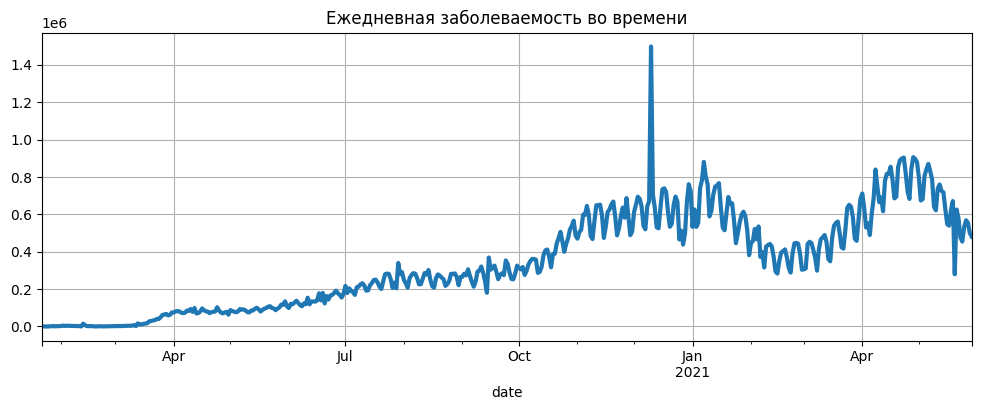

In [17]:
# Линейный график размером 12x4. Подпишем график и отобразим сетку. 
# Параметр lw (line width) отвечает за ширину линии для линейного графика.
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
    kind='line',
    figsize=(12, 4),
    title='Ежедневная заболеваемость во времени',
    grid = True,
    lw=3
);

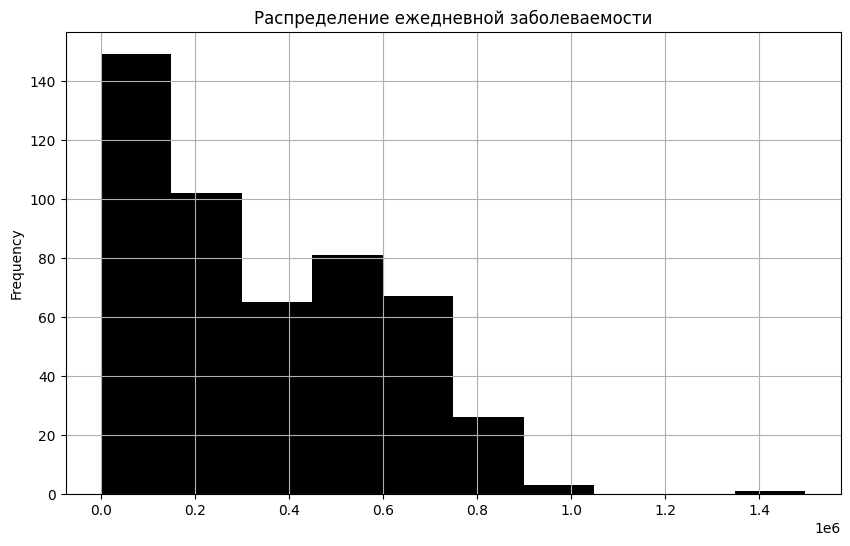

In [22]:
# Построим гистограмму, параметр kind выставляем на значение 'hist'. 
# Параметр bins (корзины) отвечает за число прямоугольников в гистограмме.
grouped_cases.plot(
    kind='hist',
    figsize=(10, 6),
    title='Распределение ежедневной заболеваемости',
    grid = True,
    color = 'black',
    bins=10
);

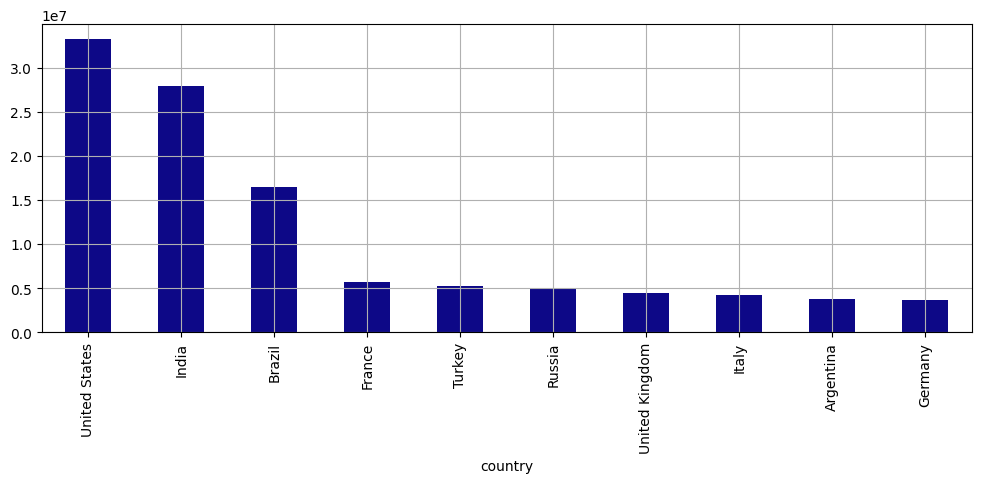

In [36]:
# Построим столбчатую диаграмму и вычислим последний зафиксированный 
# показатель с помощью агрегирующего метода last() — он возвращает 
# последнее значение в столбце DataFrame. Для построения столбчатой 
# диаграммы значение параметра kind выставляем на 'bar'. Параметр 
# colormap отвечает за цветовую гамму графика.
grouped_country = covid_df.groupby(['country'])['confirmed'].last()
grouped_country = grouped_country.nlargest(10)
grouped_country.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    colormap='plasma'
);

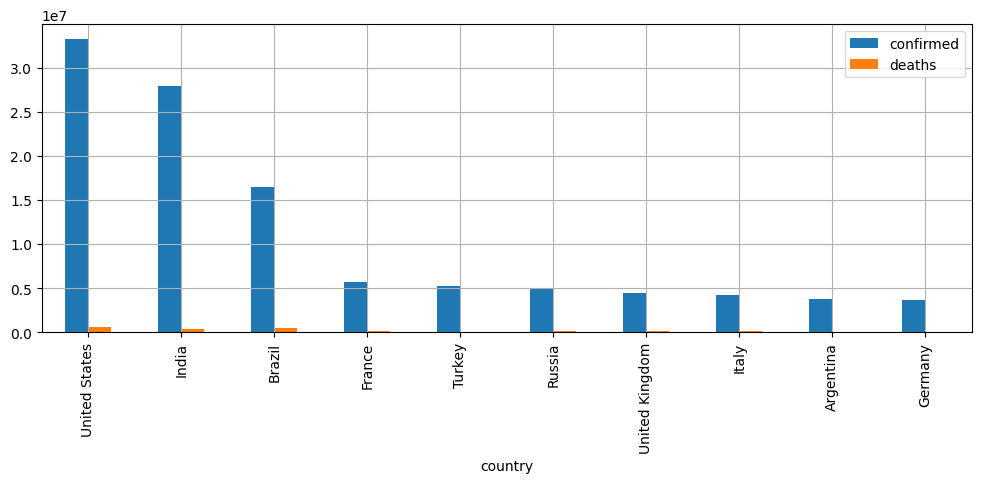

In [37]:
# Столбчатая диаграмма
grouped_country = covid_df.groupby(['country'])[['confirmed', 'deaths']].last()
grouped_country = grouped_country.nlargest(10, columns=['confirmed']) # columns=сортировка по столбцу
grouped_country.plot( 
    kind='bar', 
    grid=True, 
    figsize=(12, 4), 
);

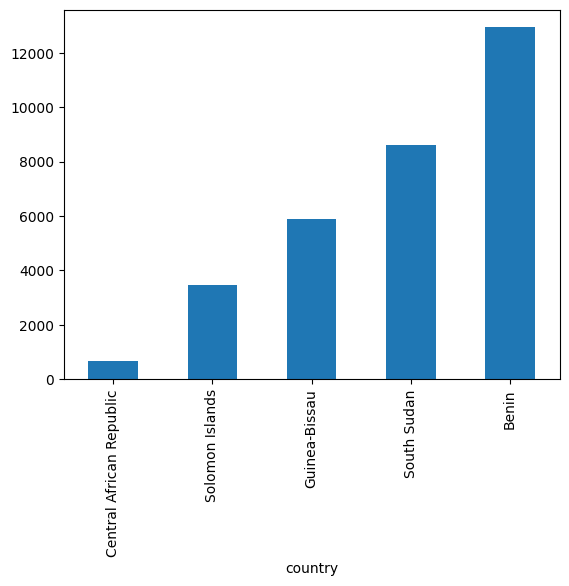

In [40]:
# Столбчатая диаграмма для пяти стран с наименьшим общим числом 
# вакцинаций на последний день рассматриваемого периода (total_vaccinations)
# метод nsmallest() позволяет выбрать n наименьших значений в Series
covid_df.groupby(['country'])['total_vaccinations'].last().nsmallest(5).plot(kind='bar');

### Графические возможности библиотеки Matplotlib

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline # для более корректного отображения графиков в ноутбуках

In [ ]:

plt.style.use('default') # для корректного отображения графиков на тёмном фоне